# Text Classification Using Naive Bayes


Your task is to:


1. Perform Test Classification using Multinomial Naive Bayes(already implemented in sklearn).


2. Implement Naive Bayes on your own from scratch for text classification. 


3. Compare Results of your implementation of Naive Bayes with one in Sklearn.





Dataset - http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups




In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [144]:
df = fetch_20newsgroups()

In [145]:
df.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [146]:
len(df.data) #total articles

11314

In [147]:
df.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [148]:
df.target  #2- target values

array([7, 4, 4, ..., 3, 1, 8])

In [149]:
cats = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [150]:
#splitting df into train and test set
train = fetch_20newsgroups(subset = 'train', categories = cats, shuffle = True, random_state = True)
test = fetch_20newsgroups(subset = 'test', categories = cats, shuffle = True, random_state = True)


In [151]:
train.data[5]

'From: HOLFELTZ@LSTC2VM.stortek.com\nSubject: Re: What did Lazarus smell like?\nOrganization: StorageTek SW Engineering\nLines: 20\n\nIn article <Apr.10.05.31.34.1993.14365@athos.rutgers.edu>\nrolfe@dsuvax.dsu.edu (Tim Rolfe) writes:\n \n>\n>My guess is that the "Lazarus, come out!" was also for the sake of the\n>crowd.\n \nI read somewhere, I think in Morton Smith\'s _Jesus the Magician_, that\nold Lazarus wasn\'t dead, but going in the tomb was part of an initiation\nrite for a magi-cult, of which Jesus was also a part.   It appears that\na 3-day stay was normal.   I wonder .... ?\n\n[I haven\'t read that book, but another one by Smith in which similar\nclaims were made about Jesus.  While I\'m sure Smith knows more about\nearly Chrisitanity than I do, I found his arguments similar to those\nof books like "Holy Blood, Holy Grail" -- building conjectures on top\nof other conjectures.  There was no direct evidence.  If you\'d like\nto summarize the argument for us, I\'d be happy to see

In [153]:
#tfidf vectorization
tfidf = TfidfVectorizer()
train_tfidf = tfidf.fit_transform(train.data)
train_tfidf.shape

(11314, 130107)

In [154]:
model = MultinomialNB()
model.fit(train_tfidf, train.target)

MultinomialNB()

In [156]:
test.target

array([ 9,  1, 10, ...,  5,  7, 13], dtype=int64)

In [157]:
#Preprocessing the test data set
test_tfidf = tfidf.transform(test.data)

In [158]:
prediction = model.predict(test_tfidf)
prediction

array([ 9,  9, 10, ...,  5,  7, 13], dtype=int64)

Text(86.99999999999999, 0.5, 'true labels')

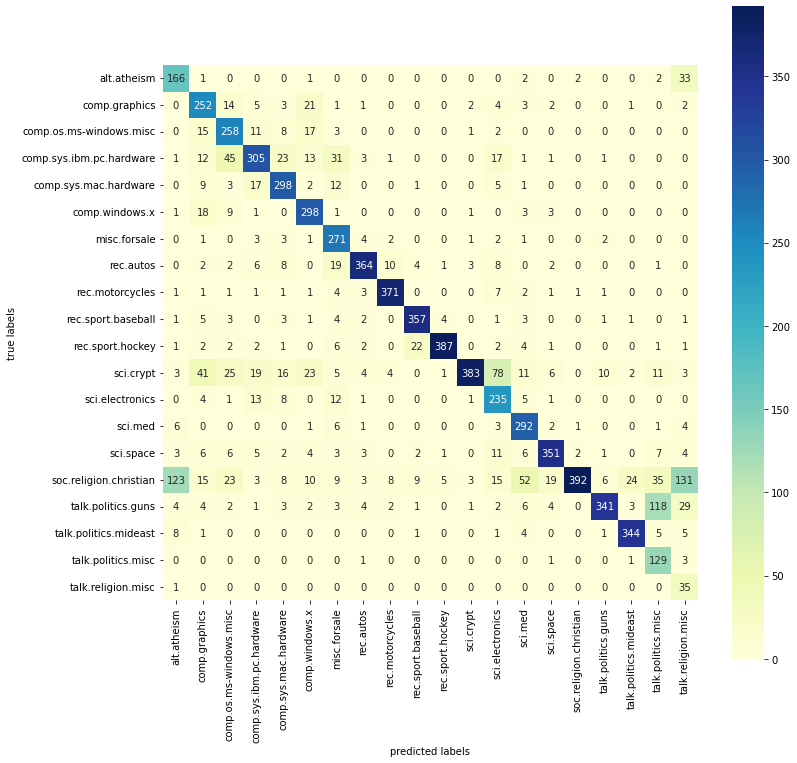

In [178]:
mat = confusion_matrix(test.target, prediction)
plt.figure(figsize=(12,12))
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cmap = "YlGnBu",
           xticklabels = train.target_names,
           yticklabels = train.target_names)

plt.xlabel('predicted labels')
plt.ylabel('true labels')

In [160]:
accuracy_score(test.target, prediction)

0.7738980350504514

In [162]:
print(classification_report(test.target, prediction))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.64      0.94      0.76       364
          17       0.93    